In [1]:
import numpy as np
import pandas as pd

reguser  = pd.read_csv('user_register_log_b.txt',sep = '\t',header = None)
reguser.columns = ['uid','rday','rtype','dtype']
# user_id用户唯一标识 register_day日期 register_type来源渠道 device type设备类型

# applog = pd.read_csv('app_launch_log_b.txt',sep = '\t',header = None)
# applog.columns = ['uid','logday']
# data = pd.merge(data,data1,on = 'uid',how = 'right')

# vidlog = pd.read_csv('video_create_log_b.txt',sep = '\t',header = None)
# vidlog.columns = ['uid','pday']#pday拍摄日期
# data = pd.merge(data,data1,on = 'uid',how = 'right')

# useract = pd.read_csv('user_activity_log_b.txt',sep = '\t',header = None)
# useract.columns = ['uid','aday','page','vid','aid','atype']
# del useract['vid']
# del useract['aid']

# print reguser,applog,vidlog,useract

In [9]:
def prereg(reguser,d1,d2):
    #n号之前注册的用户
    reguser1 = reguser.loc[reguser.rday < d2]
    #注册日期与当前的差距
    reguser1['rday_gap'] = d2 + 1 - reguser1['rday']
    reguser1.loc[reguser1.rday < d1,'rday'] = d1
    #多值特征
    for i in range(0,6):
        reguser_temp = reguser1.loc[reguser1.rtype == i]
        reguser_temp = reguser_temp.groupby('uid')['rtype'].size().reset_index().rename(columns = {'rtype':'rtype_'+ str(i)})
        reguser1 = pd.merge(reguser1,reguser_temp,on = 'uid',how = 'left')
    reguser1 = reguser1.fillna(value=0)
#     reguser1 = pd.merge(reguser1,applog,on = 'uid',how = 'left')

    #用户拍摄视频数
#     useract1 = useract.loc[(useract.aday >= d1) & (useract.aday <= d2)]
#     useract2 = useract1.groupby(['aid'])['vid'].size().reset_index().rename(columns = {'vid':'vidcnts','aid':'uid'})
#     reguser1 = pd.merge(reguser1,useract2,on = 'uid',how = 'left')
    
#     print useract2
#     print reguser1
    print reguser1
    print 'prereg done'
    return reguser1

prereg(reguser,24,30)
# reguser1 = reguser.groupby(['dtype'])['uid'].size().reset_index().rename(columns = {'uid':'dtypecnt'})
# print reguser1[:50]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


           uid  rday  rtype  dtype  rday_gap  rtype_0  rtype_1  rtype_2  \
0       167777    24      4    270        30      0.0      0.0      0.0   
1       886972    24      0      5        30      1.0      0.0      0.0   
2       921231    24      0      0        30      1.0      0.0      0.0   
3       904908    24      1     49        30      0.0      1.0      0.0   
4       460291    24      0     72        29      1.0      0.0      0.0   
5      1096316    24      1   4912        29      0.0      1.0      0.0   
6       641814    24      0     11        29      1.0      0.0      0.0   
7       816839    24      1   1454        29      0.0      1.0      0.0   
8       914942    24      0     67        28      1.0      0.0      0.0   
9       450362    24      1      6        28      0.0      1.0      0.0   
10      858989    24      0    136        28      1.0      0.0      0.0   
11      754467    24      0     10        28      1.0      0.0      0.0   
12     1291734    24     

,uid,rday,rtype,dtype,rday_gap,rtype_0,rtype_1,rtype_2,rtype_3,rtype_4,rtype_5
0,167777,24,4,270,30,0.0,0.0,0.0,0.0,1.0,0.0
1,886972,24,0,5,30,1.0,0.0,0.0,0.0,0.0,0.0
2,921231,24,0,0,30,1.0,0.0,0.0,0.0,0.0,0.0
3,904908,24,1,49,30,0.0,1.0,0.0,0.0,0.0,0.0
4,460291,24,0,72,29,1.0,0.0,0.0,0.0,0.0,0.0
5,1096316,24,1,4912,29,0.0,1.0,0.0,0.0,0.0,0.0
6,641814,24,0,11,29,1.0,0.0,0.0,0.0,0.0,0.0
7,816839,24,1,1454,29,0.0,1.0,0.0,0.0,0.0,0.0
8,914942,24,0,67,28,1.0,0.0,0.0,0.0,0.0,0.0
9,450362,24,1,6,28,0.0,1.0,0.0,0.0,0.0,0.0


In [91]:
# applog1 = applog.loc[(applog.logday >= 1) & (applog.logday <= 5)]
# applog1 = applog1.sort_index(axis = 0,ascending = True,by = ['uid','logday'])
# applog2 = applog1.groupby(by = ['uid'],as_index=False)
# for name ,group in applog2:
    
def test1(row):
    t = np.diff(row)
    temp_list = [0]
    if(len(t)):
        for k,v in itertools.groupby(t):
            if k == 1:
                temp_list.append(len(list(v)))
        num = max(temp_list) + 1
        return num
    else:
        return 1
#     print applog2.loc[applog2.uid == name]
#     print group
# print applog1
# applog1['minlog'] = applog1.groupby(by = 'uid',as_index=False).agg({'logday':get_max_log})['logday']
# print applog1.sort_index(axis = 0,ascending = True,by = ['uid','logday'])
# print applog2

In [125]:
import itertools
def get_max_log(row):
    temp_list = list(row.diff())
    temp_list.sort()
    res = [len(list(v)) for k,v in itertools.groupby(temp_list)]
    if len(res) > 1:
        return res[1] + 1
    else:
        return 1

def preapp(d1,d2):
    applog1 = applog.loc[(applog.logday >= d1) & (applog.logday <= d2)]
    #登陆日期调整到相对日期
    applog1['logday'] = applog1['logday'] - d1
    
    applog1 = applog1.sort_index(axis = 0,ascending = True,by = ['uid','logday'])
    applog2 = applog1.loc[:,['uid']]
    applog2.drop_duplicates(inplace=True)
    applog2 = applog2.reset_index(drop = True)
    c = pd.DataFrame({'a':applog1.groupby(by = 'uid',as_index=False).agg({'logday':test1})['logday']})
    applog2['maxlog'] = c['a']
    applog1 = pd.merge(applog1,applog2,on = 'uid',how = 'right')
    print applog1
    
    #最近登陆
#     applog2 = applog1.groupby('uid')['logday'].min().reset_index().rename(columns = {'logday': 'lastlog'})
#     applog1 = pd.merge(applog1,applog2,on = 'uid',how = 'right')
#     #7天内总登陆次数
#     applog2 = applog1.groupby('uid')['logday'].count().reset_index().rename(columns = {'logday': 'logsum'})
#     applog1 = pd.merge(applog1,applog2,on = 'uid',how = 'right')
#     #多值特征
#     for i in range(0,d2-d1+1):
#         applog_temp = applog1.loc[applog1.logday == i]
#         applog_temp = applog_temp.groupby('uid')['logday'].count().reset_index().rename(columns = {'logday':'log'+ str(i) + 'day'})
#         applog1 = pd.merge(applog1,applog_temp,on = 'uid',how = 'left')
#     applog1 = applog1.fillna(value=0)
#     applog1.pop('logday')
#     print applog1
    applog1.drop_duplicates(inplace=True)
#     print applog1
    print 'preapp done'
    return applog1

def get_lx_day(now):
    k1 = np.array(now)
    k2 = np.where(np.diff(k1)==1)[0]
    i = 0
    ans = []
    while i<len(k2)-1:
        l1 = 1
        while k2[i+1]-k2[i]==1:
            l1 += 1
            i += 1
            if i == len(k2)-1:
                break
        if l1 == 1:
            i += 1
            ans.append(2)
        else:
            i += 1
            ans.append(l1+1)
    if len(k2)==1:
        ans.append(2)
    return ans

preapp(24,30)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  app.launch_new_instance()


           uid  logday  maxlog
0           30       0       1
1          105       1       2
2          105       3       2
3          105       4       2
4          105       6       2
5          176       3       4
6          176       4       4
7          176       5       4
8          176       6       4
9          211       1       1
10         218       0       3
11         218       1       3
12         218       2       3
13         218       4       3
14         218       5       3
15         218       6       3
16         225       0       6
17         225       1       6
18         225       2       6
19         225       3       6
20         225       4       6
21         225       5       6
22         250       0       6
23         250       1       6
24         250       2       6
25         250       3       6
26         250       4       6
27         250       5       6
28         325       4       3
29         325       5       3
...        ...     ...     ...
98138  1

,uid,logday,maxlog
0,30,0,1
1,105,1,2
2,105,3,2
3,105,4,2
4,105,6,2
5,176,3,4
6,176,4,4
7,176,5,4
8,176,6,4
9,211,1,1


In [8]:
def previd(d1,d2):
    vidlog1 = vidlog.loc[(vidlog.pday >= d1) & (vidlog.pday <= d2)]
    vidlog1['pday'] = vidlog1['pday'] - d1
    #最近拍摄
    vidlog2 = vidlog1.groupby('uid')['pday'].max().reset_index().rename(columns = {'pday': 'lastp'})
    vidlog1 = pd.merge(vidlog1,vidlog2,on = 'uid',how = 'right')
    #7天内总拍摄次数
    vidlog2 = vidlog1.groupby('uid')['pday'].count().reset_index().rename(columns = {'pday': 'sump'})
    vidlog1 = pd.merge(vidlog1,vidlog2,on = 'uid',how = 'right')
    #多值特征
    for i in range(0,d2-d1+1):
        vidlog_temp = vidlog1.loc[vidlog1.pday == i]
        vidlog_temp = vidlog_temp.groupby('uid')['pday'].size().reset_index().rename(columns = {'pday':'p'+ str(i) + 'day'})
        vidlog1 = pd.merge(vidlog1,vidlog_temp,on = 'uid',how = 'left')
    vidlog1 = vidlog1.fillna(value=0)
    vidlog1.pop('pday')
    vidlog1.drop_duplicates(inplace=True)
#     print vidlog1
    print 'previd done'
    return vidlog1
    
# previd(24,30)

In [2]:
def preact(d1,d2):
    useract1 = useract.loc[(useract.aday >= d1) & (useract.aday <= d2)]
    useract1['aday'] = useract1['aday'] - d1
    
#     useract2 = useract1.loc[:,['uid','aday']]
#     useract2.drop_duplicates(inplace=True)
#     useract2 = useract2.groupby(['uid'])['aday'].size().reset_index().rename(columns = {'aday':'adaycnt'})
#     print useract2
#     useract2 = useract1.groupby(['aid'])['vid'].size().reset_index().rename(columns = {'vid':'aidcnt'})
#     useract1 = pd.merge(useract1,useract2,on = 'aid',how = 'left')
    
#     useract2 = useract1.groupby(['vid'])['aid'].size().reset_index().rename(columns = {'aid':'vidcnt'})
#     useract1 = pd.merge(useract1,useract2,on = 'vid',how = 'left')
    
#     useract2 = useract1.groupby(['uid'])['vidcnt'].mean().reset_index().rename(columns = {'vidcnt':'vidhot'})
#     useract1 = pd.merge(useract1,useract2,on = 'uid',how = 'left')
    
#     useract2 = useract1.groupby(['uid'])['aidcnt'].mean().reset_index().rename(columns = {'aidcnt':'aidhot'})
#     useract1 = pd.merge(useract1,useract2,on = 'uid',how = 'left')
    
#     #用户各种type总数
#     for i in range(0,5):
#         useract_temp = useract1.loc[useract1.atype == i]
#         useract_temp = useract_temp.groupby(['uid'])['atype'].count().reset_index().rename(columns = {'atype':'atype'+str(i)+'cnt'})
#         useract1 = pd.merge(useract1,useract_temp,on = 'uid',how = 'left')
#     print '用户各种type总数'
    
#     #每天每种tpye的总数
#     for i in range(0,d2-d1+1):
#         for j in range(0,5):
#             useract_temp = useract1.loc[(useract1['aday'] == i) & (useract1.atype == j)]
#             useract_temp = useract_temp.groupby(['uid','aday'])['atype'].count().reset_index().rename(columns = {'atype':'day'+str(i)+'atype'+str(j)+'cnt'})
#             del useract_temp['aday']
#             useract1 = pd.merge(useract1,useract_temp,on = 'uid',how = 'left')    
#     print '每天每种tpye的总数'
    
#     #不同page下总操作数
#     for i in range(0,5):
#         useract_temp = useract1.loc[useract1.page == i]
#         useract_temp = useract_temp.groupby(['uid'])['page'].count().reset_index().rename(columns = {'page':'page'+str(i)+'cnt'})
#         useract1 = pd.merge(useract1,useract_temp,on = 'uid',how = 'left')
#     print '不同page下总操作数'
    
#     #用户总操作数
#     useract2 = useract1.groupby(['uid'])['aday'].size().reset_index().rename(columns = {'aday':'asum'})
#     useract1 = pd.merge(useract1,useract2,on = ['uid'],how = 'right')
#     print '用户总操作数'
    
# #     每天每page操作数
#     for i in range(0,d2-d1+1):
#         for j in range(0,5):
#             useract_temp = useract1.loc[(useract1['aday'] == i) & (useract1.page == j)]
#             useract_temp = useract_temp.groupby(['uid','aday'])['page'].count().reset_index().rename(columns = {'page':'day'+str(i)+'page'+str(j)+'cnt'})
#             del useract_temp['aday']
#             useract1 = pd.merge(useract1,useract_temp,on = 'uid',how = 'left')
#     print '每天每page操作数'
    
#     #用户每天操作数
#     useract2 = useract1.groupby(['uid','aday']).size().reset_index().rename(columns = {0:'asum'})
#     useract2['asum_log'] = (np.log(useract2['asum'] + 1)/np.log(2)).astype(int)
#     useract2['asum_log2'] = np.log(useract2['asum'] + 1)/np.log(2)
#     useract2['asum_log2'] = useract2['asum_log2'].apply(lambda x: float('%.2f' % x))
#     print useract2
#     for i in range(0,d2-d1+1):
#         useract_temp = useract2.loc[useract2.aday == i,['uid','asum']]
#         useract_temp['asum_' + str(i)] = useract_temp['asum']
# #         print useract_temp
#         del useract_temp['asum']
#         useract2 = pd.merge(useract2,useract_temp,on = 'uid',how = 'left')
#     del useract2['aday']
#     useract1 = pd.merge(useract1,useract2,on = 'uid',how = 'left')
#     print '用户每天操作数'
    
#     dic = {}
#     groupby_size = dict(useract1.groupby(['uid','aday']).size())
#     seq_activity = []
#     for val in useract1['uid']:
#         temp = []
#         for day in range(0,d2-d1+1):
#             if (val,day) in groupby_size:
#                 temp.append(str(7-day)+ '_' + str(int(np.log(groupby_size[(val,day)] + 1)/np.log(2))))
#         if len(temp) == 0:
#             temp.append('UNK_UNK')
#         seq_activity.append(' '.join(temp))
#     useract1['seq_activity'] = seq_activity

    print useract1.columns
    del useract1['aday']
    del useract1['page']
    del useract1['atype']
    del useract1['vid']
    del useract1['aid']
    del useract1['vidcnt']
    del useract1['aidcnt']
    print 'del done'
    useract1 = useract1.fillna(value=0)
    useract1.drop_duplicates(inplace=True)
#     print useract1
    print 'preact done'
    return useract1

def act_sum_n(d1,d2):
    useract1 = useract.loc[(useract.aday >= d1) & (useract.aday <= d2)]
    useract1['aday'] = useract1['aday'] - d1
    
    #用户每天操作数
    useract2 = useract1.groupby(['uid','aday']).size().reset_index().rename(columns = {0:'asum'})
    useract2['asum'] = np.log(useract2['asum'] + 1)/np.log(2)
    for i in range(d2-d1+1-7,d2-d1+1):
        useract_temp = useract2.loc[useract2.aday == i,['uid','asum']]
        useract_temp['asum_' + str(i)] = useract_temp['asum']
        del useract_temp['asum']
        useract2 = pd.merge(useract2,useract_temp,on = 'uid',how = 'left')
    del useract2['aday']
    useract1 = pd.merge(useract1,useract2,on = 'uid',how = 'left')
    print '用户每天操作数'
    
    del useract2
    print useract1.columns
    del useract1['aday']
    del useract1['page']
    del useract1['atype']
    del useract1['vid']
    del useract1['aid']
    del useract1['asum']
    print 'del done'
    useract1 = useract1.drop_duplicates(inplace=True)
    useract1 = useract1.fillna(value=0)
    print 'preact done'
    useract1.to_csv('act_sum_n_' + str(d1) + '_' + str(d2) + '.csv', index=False)
    return useract1

preact(15,30)
# act_sum_n(1,16)
# import pandas as pd
# temp = pd.read_csv('act_sum_n_' + str(1) + '_' + str(16) + '.csv')
# temp.drop_duplicates(inplace=True)
# temp.to_csv('act_sum_n_' + str(1) + '_' + str(16) + '.csv', index=False)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Index([u'uid', u'aday', u'page', u'vid', u'aid', u'atype', u'asum_log',
       u'asum_max', u'asum_min', u'asum_log_max', u'asum_log_min'],
      dtype='object')


KeyError: 'vidcnt'

In [6]:
def addlabel(d1,d2):
    applog1 = applog.loc[(applog.logday >= d1) & (applog.logday <= d2)]
#     reguser1 = reguser.loc[(reguser.rday >= d1) & (reguser.rday <= d2)]
    vidlog1 = vidlog.loc[(vidlog.pday >= d1) & (vidlog.pday <= d2)]
    useract1 = useract.loc[(useract.aday >= d1) & (useract.aday <= d2)]
    user = pd.concat([applog1['uid'],vidlog1['uid'],useract1['uid']])
    user.drop_duplicates(inplace=True)
    user = pd.DataFrame({'uid':user})
    user['label'] = 1
    print user.columns
#     user = pd.merge(reguser,user,on = 'uid',how = 'left')
    user = user.fillna(value=0)
#     print user
    return user

# addlabel(24,30)

In [7]:
def predata(d1,d2):
    data = prereg(reguser,d1+7,d2+7)
#     print data
    data = pd.merge(data,preapp(d1,d2),on = 'uid',how = 'left')
#     print data
    data = pd.merge(data,previd(d1,d2),on = 'uid',how = 'left')
#     print data
    data = pd.merge(data,preact(d1,d2),on = 'uid',how = 'left')
#     print data
    data = data.fillna(value=0)
    data.drop_duplicates(inplace=True)
    return data

# def pretrain():
#     train = prereg(reguser,24,30)
# #     print train
#     train = pd.merge(train,preapp(17,23),on = 'uid',how = 'left')
# #     print train
#     train = pd.merge(train,previd(17,23),on = 'uid',how = 'left')
# #     print train
#     train = pd.merge(train,preact(17,23),on = 'uid',how = 'left')
# #     print train
#     train = pd.merge(train,addlabel(24,30),on = 'uid',how = 'left')
# #     print train
#     train = train.fillna(value=0)
#     train.drop_duplicates(inplace=True)
    
#     train2 = prereg(reguser,17,23)
# #     print train
#     train2 = pd.merge(train2,preapp(10,16),on = 'uid',how = 'left')
# #     print train
#     train2 = pd.merge(train2,previd(10,16),on = 'uid',how = 'left')
# #     print train
#     train2 = pd.merge(train2,preact(10,16),on = 'uid',how = 'left')
# #     print train
#     train2 = pd.merge(train2,addlabel(17,23),on = 'uid',how = 'left')
# #     print train
#     train2 = train2.fillna(value=0)
#     train2.drop_duplicates(inplace=True)
#     train = pd.concat([train,train2])
#     return train

def pretrain():
    train = predata(17,23)
    train = pd.merge(train,addlabel(24,30),on = 'uid',how = 'left')
    temp = predata(10,16)
    temp = pd.merge(temp,addlabel(17,23),on = 'uid',how = 'left')
    train = pd.concat([train,temp])
    train = train.fillna(value=0)
    train.drop_duplicates(inplace=True)
    return train
    
def pretest():
    test = predata(24,30)
    test = test.fillna(value=0)
    test.drop_duplicates(inplace=True)
    return test
    
train = pretrain()
test = pretest()


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


prereg done
preapp done


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


previd done
用户各种type总数
每天每种tpye的总数
不同page下总操作数
用户总操作数
每天每page操作数
用户每天操作数
Index([u'uid', u'aday', u'page', u'vid', u'aid', u'atype', u'aidcnt',
       u'vidcnt', u'vidhot', u'aidhot', u'atype0cnt', u'atype1cnt',
       u'atype2cnt', u'atype3cnt', u'atype4cnt', u'day0atype0cnt',
       u'day0atype1cnt', u'day0atype2cnt', u'day0atype3cnt', u'day0atype4cnt',
       u'day1atype0cnt', u'day1atype1cnt', u'day1atype2cnt', u'day1atype3cnt',
       u'day1atype4cnt', u'day2atype0cnt', u'day2atype1cnt', u'day2atype2cnt',
       u'day2atype3cnt', u'day2atype4cnt', u'day3atype0cnt', u'day3atype1cnt',
       u'day3atype2cnt', u'day3atype3cnt', u'day3atype4cnt', u'day4atype0cnt',
       u'day4atype1cnt', u'day4atype2cnt', u'day4atype3cnt', u'day4atype4cnt',
       u'day5atype0cnt', u'day5atype1cnt', u'day5atype2cnt', u'day5atype3cnt',
       u'day5atype4cnt', u'day6atype0cnt', u'day6atype1cnt', u'day6atype2cnt',
       u'day6atype3cnt', u'day6atype4cnt', u'page0cnt', u'page1cnt',
       u'page2cnt', u

MemoryError: 

In [99]:
print train.shape
print test.shape
print train.columns
print test.columns
train_y = train.pop('label')
print train_y.shape

from sklearn.cross_validation import train_test_split
train_x, evals_x, train_y, evals_y = train_test_split(train, train_y, test_size=0.2, random_state=2018)
del train_x['uid']
del evals_x['uid']

           uid  rday  rtype  dtype  rtype_0  rtype_1  rtype_2  rtype_3  \
0       744025    23      1    283      0.0      1.0      0.0      0.0   
1      1270299    23      1    259      0.0      1.0      0.0      0.0   
2       571220    23      1      2      0.0      1.0      0.0      0.0   
3      1308501    23      0     23      1.0      0.0      0.0      0.0   
4       745554    23      2      0      0.0      0.0      1.0      0.0   
5      1031012    23      1    650      0.0      1.0      0.0      0.0   
6       913297    23      2    593      0.0      0.0      1.0      0.0   
7       266500    23      0    403      1.0      0.0      0.0      0.0   
8       475120    23      0    135      1.0      0.0      0.0      0.0   
9       547944    23      0      9      1.0      0.0      0.0      0.0   
10      916655    22      5     10      0.0      0.0      0.0      0.0   
11      719262    22      0      7      1.0      0.0      0.0      0.0   
12     1026175    22      1     10    

KeyError: 'label'

In [105]:
import lightgbm as lgb

print("LGB test")
clf = lgb.LGBMClassifier(
    boosting_type='gbdt', num_leaves=15, reg_alpha=0.0, reg_lambda=1,
    max_depth=-1, n_estimators=5000, objective='binary',
    subsample=0.7, colsample_bytree=0.7, subsample_freq=1,
    learning_rate=0.01, min_child_weight=50, random_state=2018, n_jobs=-1
)
clf.fit(train_x, train_y, eval_set=[(evals_x, evals_y)], eval_metric={'auc', 'binary_logloss'},early_stopping_rounds=50)
res = pd.DataFrame()
res['uid'] = test.pop('uid')
res['score'] = clf.predict_proba(test)[:,1]
# res['score'] = res['score'].apply(lambda x: float('%.6f' % x))
# res.to_csv('submission.csv', index=False)

# M = set(pred.user_id)
# N = set(real.user_id)
# Precision = len(M.intersection(N))/len(M)
# Recall = len(M.intersection(N))/len(N)
# F1 = 2*Precision*Recall/(Precision+Recall)

# print("Precision=",Precision,"| Recall=",Recall)
# print("F1=",F1)

LGB test
[1]	valid_0's binary_logloss: 0.68904	valid_0's auc: 0.862195
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.684921	valid_0's auc: 0.866485
[3]	valid_0's binary_logloss: 0.680992	valid_0's auc: 0.868918
[4]	valid_0's binary_logloss: 0.677131	valid_0's auc: 0.868793
[5]	valid_0's binary_logloss: 0.673309	valid_0's auc: 0.86875
[6]	valid_0's binary_logloss: 0.669435	valid_0's auc: 0.869304
[7]	valid_0's binary_logloss: 0.665679	valid_0's auc: 0.86956
[8]	valid_0's binary_logloss: 0.661982	valid_0's auc: 0.869504
[9]	valid_0's binary_logloss: 0.658405	valid_0's auc: 0.869483
[10]	valid_0's binary_logloss: 0.655211	valid_0's auc: 0.869636
[11]	valid_0's binary_logloss: 0.651821	valid_0's auc: 0.869852
[12]	valid_0's binary_logloss: 0.648513	valid_0's auc: 0.87
[13]	valid_0's binary_logloss: 0.645371	valid_0's auc: 0.869768
[14]	valid_0's binary_logloss: 0.642152	valid_0's auc: 0.869919
[15]	valid_0's binary_logloss: 0.639021	valid_0's

[129]	valid_0's binary_logloss: 0.475466	valid_0's auc: 0.872353
[130]	valid_0's binary_logloss: 0.474929	valid_0's auc: 0.872357
[131]	valid_0's binary_logloss: 0.474394	valid_0's auc: 0.872357
[132]	valid_0's binary_logloss: 0.473869	valid_0's auc: 0.872366
[133]	valid_0's binary_logloss: 0.473326	valid_0's auc: 0.87239
[134]	valid_0's binary_logloss: 0.472838	valid_0's auc: 0.872383
[135]	valid_0's binary_logloss: 0.47234	valid_0's auc: 0.872397
[136]	valid_0's binary_logloss: 0.471858	valid_0's auc: 0.872415
[137]	valid_0's binary_logloss: 0.471364	valid_0's auc: 0.872425
[138]	valid_0's binary_logloss: 0.470893	valid_0's auc: 0.872435
[139]	valid_0's binary_logloss: 0.470439	valid_0's auc: 0.872439
[140]	valid_0's binary_logloss: 0.469977	valid_0's auc: 0.872455
[141]	valid_0's binary_logloss: 0.469518	valid_0's auc: 0.872466
[142]	valid_0's binary_logloss: 0.46905	valid_0's auc: 0.87249
[143]	valid_0's binary_logloss: 0.468594	valid_0's auc: 0.872509
[144]	valid_0's binary_loglos

[286]	valid_0's binary_logloss: 0.440711	valid_0's auc: 0.875568
[287]	valid_0's binary_logloss: 0.440636	valid_0's auc: 0.875566
[288]	valid_0's binary_logloss: 0.440579	valid_0's auc: 0.875571
[289]	valid_0's binary_logloss: 0.440513	valid_0's auc: 0.875603
[290]	valid_0's binary_logloss: 0.440453	valid_0's auc: 0.875601
[291]	valid_0's binary_logloss: 0.440386	valid_0's auc: 0.875621
[292]	valid_0's binary_logloss: 0.440322	valid_0's auc: 0.875665
[293]	valid_0's binary_logloss: 0.44026	valid_0's auc: 0.875659
[294]	valid_0's binary_logloss: 0.440198	valid_0's auc: 0.875639
[295]	valid_0's binary_logloss: 0.440148	valid_0's auc: 0.875634
[296]	valid_0's binary_logloss: 0.440088	valid_0's auc: 0.875646
[297]	valid_0's binary_logloss: 0.440025	valid_0's auc: 0.875712
[298]	valid_0's binary_logloss: 0.439975	valid_0's auc: 0.875727
[299]	valid_0's binary_logloss: 0.439922	valid_0's auc: 0.875693
[300]	valid_0's binary_logloss: 0.439856	valid_0's auc: 0.875669
[301]	valid_0's binary_log

[442]	valid_0's binary_logloss: 0.435716	valid_0's auc: 0.876526
[443]	valid_0's binary_logloss: 0.435705	valid_0's auc: 0.876534
[444]	valid_0's binary_logloss: 0.435695	valid_0's auc: 0.876547
[445]	valid_0's binary_logloss: 0.435685	valid_0's auc: 0.876544
[446]	valid_0's binary_logloss: 0.435674	valid_0's auc: 0.876551
[447]	valid_0's binary_logloss: 0.435662	valid_0's auc: 0.876552
[448]	valid_0's binary_logloss: 0.435653	valid_0's auc: 0.876549
[449]	valid_0's binary_logloss: 0.435642	valid_0's auc: 0.876559
[450]	valid_0's binary_logloss: 0.435631	valid_0's auc: 0.876565
[451]	valid_0's binary_logloss: 0.435623	valid_0's auc: 0.876571
[452]	valid_0's binary_logloss: 0.435617	valid_0's auc: 0.876571
[453]	valid_0's binary_logloss: 0.435604	valid_0's auc: 0.876574
[454]	valid_0's binary_logloss: 0.435593	valid_0's auc: 0.876573
[455]	valid_0's binary_logloss: 0.435589	valid_0's auc: 0.876564
[456]	valid_0's binary_logloss: 0.435576	valid_0's auc: 0.876569
[457]	valid_0's binary_lo

[603]	valid_0's binary_logloss: 0.434607	valid_0's auc: 0.877008
[604]	valid_0's binary_logloss: 0.434606	valid_0's auc: 0.877009
[605]	valid_0's binary_logloss: 0.434604	valid_0's auc: 0.877005
[606]	valid_0's binary_logloss: 0.434601	valid_0's auc: 0.877006
[607]	valid_0's binary_logloss: 0.4346	valid_0's auc: 0.877006
[608]	valid_0's binary_logloss: 0.434598	valid_0's auc: 0.877001
[609]	valid_0's binary_logloss: 0.434593	valid_0's auc: 0.877
[610]	valid_0's binary_logloss: 0.434585	valid_0's auc: 0.877007
[611]	valid_0's binary_logloss: 0.434582	valid_0's auc: 0.877009
[612]	valid_0's binary_logloss: 0.434578	valid_0's auc: 0.877014
[613]	valid_0's binary_logloss: 0.434574	valid_0's auc: 0.877018
[614]	valid_0's binary_logloss: 0.434569	valid_0's auc: 0.877026
[615]	valid_0's binary_logloss: 0.434566	valid_0's auc: 0.877029
[616]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.877028
[617]	valid_0's binary_logloss: 0.434558	valid_0's auc: 0.877031
[618]	valid_0's binary_logloss

[772]	valid_0's binary_logloss: 0.434141	valid_0's auc: 0.877265
[773]	valid_0's binary_logloss: 0.434135	valid_0's auc: 0.877272
[774]	valid_0's binary_logloss: 0.434139	valid_0's auc: 0.877271
[775]	valid_0's binary_logloss: 0.434135	valid_0's auc: 0.877271
[776]	valid_0's binary_logloss: 0.434132	valid_0's auc: 0.877272
[777]	valid_0's binary_logloss: 0.434132	valid_0's auc: 0.87727
[778]	valid_0's binary_logloss: 0.434131	valid_0's auc: 0.877273
[779]	valid_0's binary_logloss: 0.434124	valid_0's auc: 0.877278
[780]	valid_0's binary_logloss: 0.434123	valid_0's auc: 0.877276
[781]	valid_0's binary_logloss: 0.434124	valid_0's auc: 0.877281
[782]	valid_0's binary_logloss: 0.434122	valid_0's auc: 0.877283
[783]	valid_0's binary_logloss: 0.434119	valid_0's auc: 0.877281
[784]	valid_0's binary_logloss: 0.434116	valid_0's auc: 0.877282
[785]	valid_0's binary_logloss: 0.434118	valid_0's auc: 0.877281
[786]	valid_0's binary_logloss: 0.434117	valid_0's auc: 0.877282
[787]	valid_0's binary_log

[940]	valid_0's binary_logloss: 0.433886	valid_0's auc: 0.87736
[941]	valid_0's binary_logloss: 0.433883	valid_0's auc: 0.87736
[942]	valid_0's binary_logloss: 0.433878	valid_0's auc: 0.877365
[943]	valid_0's binary_logloss: 0.433878	valid_0's auc: 0.87737
[944]	valid_0's binary_logloss: 0.433882	valid_0's auc: 0.877367
[945]	valid_0's binary_logloss: 0.433886	valid_0's auc: 0.87736
[946]	valid_0's binary_logloss: 0.433882	valid_0's auc: 0.877362
[947]	valid_0's binary_logloss: 0.433881	valid_0's auc: 0.877362
[948]	valid_0's binary_logloss: 0.433883	valid_0's auc: 0.87736
[949]	valid_0's binary_logloss: 0.433883	valid_0's auc: 0.87736
[950]	valid_0's binary_logloss: 0.433882	valid_0's auc: 0.877361
[951]	valid_0's binary_logloss: 0.433877	valid_0's auc: 0.877365
[952]	valid_0's binary_logloss: 0.433875	valid_0's auc: 0.87737
[953]	valid_0's binary_logloss: 0.433877	valid_0's auc: 0.877367
[954]	valid_0's binary_logloss: 0.433877	valid_0's auc: 0.877367
[955]	valid_0's binary_logloss: 

In [93]:
# temp = evals_x['uid']
temp1 = pd.DataFrame()
temp1['label'] = evals_y
# temp1['uid'] = evals_x['uid']
print temp1.columns


Index([u'label'], dtype='object')


In [95]:
result = res.sort_index(axis = 0,ascending = False,by = 'score')
print result
result = result['uid'][0:23800]
result.to_csv('result.csv', index=False)

           uid     score
14281  1273263  0.987945
46947   901946  0.987824
36296   937534  0.987816
44027  1295715  0.987764
4838    914319  0.987712
37253   929042  0.987649
19385    49590  0.987571
47644  1099721  0.987552
8696   1054620  0.987546
49161  1221744  0.987536
22996  1295721  0.987528
25825   717580  0.987445
9117   1014912  0.987425
22914   197951  0.987393
22023   793821  0.987381
36867   629274  0.987363
39612  1347364  0.987358
17699  1327886  0.987343
51146   787055  0.987342
17740   654584  0.987341
39256  1237088  0.987331
8709    963698  0.987330
48012   645275  0.987305
4521    332253  0.987303
9931    895656  0.987276
7269    274403  0.987274
28784   971789  0.987270
10864  1111898  0.987262
47933  1184722  0.987251
35427  1088096  0.987241
...        ...       ...
45026   411046  0.041185
36418   954566  0.041126
10177  1135681  0.041126
5803   1093461  0.041124
6710    253882  0.041114
35205   873981  0.041099
38908   476988  0.041012
35989   276632  0.041009


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [104]:
print clf.feature_importances_
train_x.columns

[1905  898 2994  126  381  205    0   15   18    0    0    0    0    0
    0 1324 1271  172  257  172  150  155  289  174  208  134    0   15
    0   10   15    6   36 2524]


Index([u'rday', u'rtype', u'dtype', u'rtype_0', u'rtype_1', u'rtype_2',
       u'rtype_3', u'rtype_4', u'rtype_5', u'rtype_6', u'rtype_7', u'rtype_8',
       u'rtype_9', u'rtype_10', u'rtype_11', u'lastlog', u'logsum', u'log0day',
       u'log1day', u'log2day', u'log3day', u'log4day', u'log5day', u'log6day',
       u'lastp', u'sump', u'p0day', u'p1day', u'p2day', u'p3day', u'p4day',
       u'p5day', u'p6day', u'asum'],
      dtype='object')

In [3]:
def act_min_max(d1,d2):
    useract1 = useract.loc[(useract.aday >= d1) & (useract.aday <= d2),['uid','aday']]
    useract1['aday'] = useract1['aday'] - d1
    #用户每天max_min操作数
    useract2 = useract1.groupby(['uid','aday']).size().reset_index().rename(columns = {0:'asum'})
    useract2['asum_log'] = (np.log(useract2['asum'] + 1)/np.log(2)).astype(int)
    useract_temp = useract2.groupby(['uid'])['asum'].max().reset_index().rename(columns = {'asum':'asum_max'})
    useract2 = pd.merge(useract2,useract_temp,on = 'uid',how = 'left')
    useract_temp = useract2.groupby(['uid'])['asum'].min().reset_index().rename(columns = {'asum':'asum_min'})
    useract2 = pd.merge(useract2,useract_temp,on = 'uid',how = 'left')

    useract_temp = useract2.groupby(['uid'])['asum_log'].max().reset_index().rename(columns = {'asum_log':'asum_log_max'})
    useract2 = pd.merge(useract2,useract_temp,on = 'uid',how = 'left')
    useract_temp = useract2.groupby(['uid'])['asum_log'].min().reset_index().rename(columns = {'asum_log':'asum_log_min'})
    useract2 = pd.merge(useract2,useract_temp,on = 'uid',how = 'left')
    del useract2['aday']
    del useract2['asum']
    del useract2['asum_log']
    useract1 = pd.merge(useract1,useract2,on = 'uid',how = 'left')
    
    del useract2
    del useract1['aday']
    useract1.drop_duplicates(inplace=True)
    useract1 = useract1.fillna(value=0)
    print 'act_sum_n done'
    return useract1

act_min_max(15,30)

              uid  aday
0         1062323     7
1          639898     2
3          817201     7
4          817201     8
6          817201     8
7          817201     7
8         1000679    12
11         538444     8
12         538444     9
13         569722    12
14         312054     1
15         312054     1
17        1277583     6
18         312054     1
19         312054     1
20         817201     7
21          67221    12
26        1145952     1
27         923738     2
29        1084467     1
30         913064     2
31        1323329     8
32          66093     3
34        1225818    10
35          66093     3
37         462319     0
38        1000679    12
40         312054     1
41         312054     1
46         817201     8
...           ...   ...
20607198   409417    15
20607199   409417    15
20607200   409417    15
20607201   409417    15
20607202  1310072    15
20607203    47841    15
20607204  1013351    15
20607205  1013351    15
20607206  1013351    15
20607207  101335

,uid,asum_max,asum_min,asum_log_max,asum_log_min
0,1062323,328,4,8,2
5,639898,114,100,6,6
7,817201,76,27,6,4
15,1000679,328,33,8,5
19,538444,92,13,6,3
29,569722,35,35,5,5
30,312054,22,22,4,4
32,1277583,190,1,7,1
52,67221,503,147,8,7
57,1145952,452,74,8,6


In [7]:
import pandas as pd
result = pd.read_csv('result_final.csv')
print result.columns
result['score'] = result['score0']+result['score1']+result['score2']+result['score3']+result['score4']
print result
result = result.sort_index(axis = 0,ascending = False,by = 'score')
print result
result = result['uid'][0:24600]
result.to_csv('result.csv', index=False)

Index([u'uid', u'score0', u'score1', u'score2', u'score3', u'score4'], dtype='object')
           uid    score0    score1    score2    score3    score4     score
0       744025  0.080544  0.073121  0.072563  0.077128  0.076059  0.379414
1      1270299  0.079500  0.071926  0.072556  0.077231  0.075350  0.376563
2       571220  0.920837  0.919064  0.928972  0.929013  0.928555  4.626442
3      1308501  0.860066  0.880939  0.882482  0.870183  0.874614  4.368285
4       745554  0.422484  0.412401  0.431070  0.402736  0.455459  2.124151
5      1031012  0.067520  0.062467  0.066770  0.069758  0.069767  0.336283
6       913297  0.960748  0.958662  0.964429  0.962806  0.952728  4.799374
7       266500  0.638545  0.643763  0.685572  0.635868  0.609110  3.212858
8       475120  0.090939  0.087875  0.086342  0.090663  0.081487  0.437305
9       547944  0.102946  0.103547  0.098912  0.099450  0.099113  0.503969
10      916655  0.077188  0.071001  0.059192  0.066599  0.068175  0.342156
11      71926

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [10]:
import pandas as pd
result = pd.read_csv('result_lgb_xgb.csv')
print result.columns
result['score'] = result['score_lgb']+result['score_xgb']
print result
result = result.sort_index(axis = 0,ascending = False,by = 'score')
print result
result = result['uid'][0:24600]
result.to_csv('result.csv', index=False)

Index([u'uid', u'score_lgb', u'score_xgb'], dtype='object')
           uid  score_lgb  score_xgb     score
0       744025   0.080849   0.079026  0.159875
1      1270299   0.080753   0.078427  0.159180
2       571220   0.915618   0.913682  1.829301
3      1308501   0.864290   0.840896  1.705186
4       745554   0.427967   0.437663  0.865630
5      1031012   0.065775   0.071176  0.136951
6       913297   0.959342   0.935461  1.894804
7       266500   0.623904   0.649525  1.273430
8       475120   0.088926   0.091532  0.180459
9       547944   0.102782   0.102815  0.205597
10      916655   0.074657   0.087590  0.162247
11      719262   0.170888   0.164446  0.335334
12     1026175   0.347916   0.342301  0.690217
13     1140342   0.337546   0.300579  0.638125
14      688100   0.072357   0.073494  0.145852
15     1342459   0.833871   0.765688  1.599558
16      926263   0.889160   0.860297  1.749457
17       40710   0.079240   0.084565  0.163805
18      246954   0.067077   0.059317  0.126394


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [ ]:
import seaborn as sns
color = sns.color_palette()
device_type = reguser['dtype'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(device_type.index, device_type.values, color=color[2])
plt.ylabel('type count', fontsize=12)
plt.xlabel('device type', fontsize=12)
plt.show()

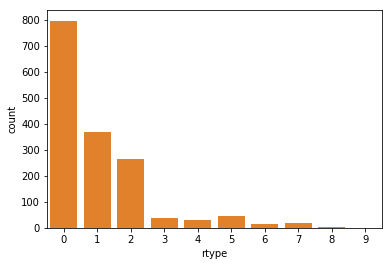

In [13]:
sns.countplot(x='rtype', data=reguser.loc[reguser.rday == 25], color=color[1])

In [14]:
feature = ['dtype','dtypecnt', 'ave_act','page3_ratio', 'rday', 'atype1_ratio', 
           'atype0_ratio', 'page0_ratio', 'page1_ratio', 'lastlog']
df = pd.DataFrame([742, 450, 337, 324, 321, 302, 298, 289, 277, 272], columns=['cols'])

TypeError: bar() got multiple values for keyword argument 'align'

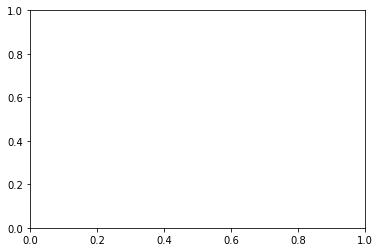

In [26]:
# sns.plot(y='cols', data=df, color=color[1])
from matplotlib import pyplot as plt
sns.barplot(df.cols.index, df.cols.values, color=color[1], align='center')
plt.ylabel('Number of 0 and 1', fontsize=12)
plt.xlabel('label', fontsize=12)
plt.show()

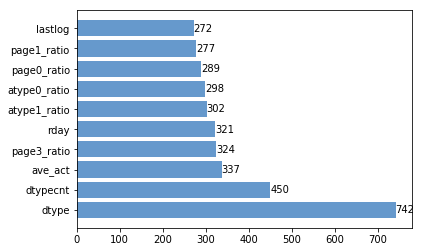

In [27]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#数据
name=['dtype','dtypecnt', 'ave_act','page3_ratio', 'rday', 'atype1_ratio', 
           'atype0_ratio', 'page0_ratio', 'page1_ratio', 'lastlog']
colleges=[742, 450, 337, 324, 321, 302, 298, 289, 277, 272]

#图像绘制
fig,ax=plt.subplots()
b=ax.barh(range(len(name)),colleges,color='#6699CC')

#添加数据标签
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%d'%int(w),ha='left',va='center')

#设置Y轴刻度线标签
ax.set_yticks(range(len(name)))
#font=FontProperties(fname=r'/Library/Fonts/Songti.ttc')
ax.set_yticklabels(name)

plt.show()